# **과제03**

In [ ]:
import csv
import heapq
from datetime import datetime

class Student:
    def __init__(self, name, birthday_str):
        self.name = name
        self.birthday_str = birthday_str
        try:
            self.birthday = datetime.strptime(birthday_str, '%Y%m%d')
        except ValueError:
            print(f"경고: 잘못된 생일 형식입니다: {birthday_str}. YYYYMMDD 형식이어야 합니다.")
            self.birthday = datetime.min

    def __lt__(self, other):
        return self.birthday < other.birthday

    def __repr__(self):
        return f"이름: {self.name}, 생일: {self.birthday_str}"

def load_students_from_csv(filename):
    """CSV 파일에서 학생 정보를 읽어 Student 객체 리스트로 반환합니다."""
    students = []
    try:
        with open(filename, 'r', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            header = next(reader)
            if header != ['학번', '이름', '생일']:
                print("경고: CSV 파일 헤더가 '학번', '이름', '생일'이 아닐 수 있습니다. 열 순서에 주의하세요.")

            for row in reader:
                if len(row) == 3:
                    name = row[1]
                    birthday_str = row[2]
                    students.append(Student(name, birthday_str))
                else:
                    print(f"경고: 행의 데이터가 부족합니다: {row}")
    except FileNotFoundError:
        print(f"Error: 파일 '{filename}'을 찾을 수 없습니다.")
        return None
    except Exception as e:
        print(f"Error: CSV 파일을 읽는 동안 오류가 발생했습니다: {e}")
        return None
    return students

def store_students_in_heap(students):
    """Student 객체 리스트를 생일이 느린 순서로 힙에 저장합니다."""
    heap = []
    for student in students:
        heapq.heappush(heap, student)
    return heap

def get_top_10_latest_birthdays(student_heap):

    top_10 = heapq.nlargest(10, student_heap)
    return top_10

if __name__ == "__main__":
    csv_filename = 'birthday.csv'
    student_list = load_students_from_csv(csv_filename)

    if student_list:
        student_heap = store_students_in_heap(student_list)

        latest_birthday_friends = get_top_10_latest_birthdays(student_heap)

        print("\n생일이 느린 순서대로 10명의 친구:")
        for student in latest_birthday_friends:
            print(student)




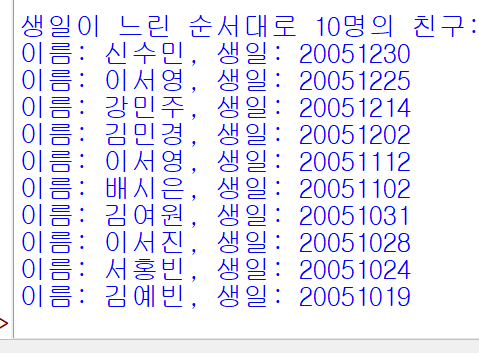

# **과제04**

In [ ]:
import csv

filename = 'birthday.csv'

group_members = ['홍서연', '이서연', '이채린', '정혜민', '윤소정', '강주영', '김예원', '김소민', '강다원', '김예빈']

class Node:
    def __init__(self, name, birth):
        self.name = name
        self.birth = birth
        self.prev = None
        self.next = None


class CircularDoublyLinkedList:
    def __init__(self):
        self.head = None

    def append(self, name, birth):
        new_node = Node(name, birth)
        if self.head is None:
            self.head = new_node
            new_node.next = new_node.prev = new_node
        else:
            tail = self.head.prev
            tail.next = new_node
            new_node.prev = tail
            new_node.next = self.head
            self.head.prev = new_node

    def display_group(self, members):
        current = self.head
        if not current:
            return
        print("🎯 같은 조 친구들의 생일 정보:")
        while True:
            if current.name in members:
                print(f"{current.name}: {current.birth}")
            current = current.next
            if current == self.head:
                break

cdll = CircularDoublyLinkedList()
with open(filename, encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        name = row[1]
        birth = row[2]
        if birth:
            cdll.append(name, birth)

cdll.display_group(group_members)



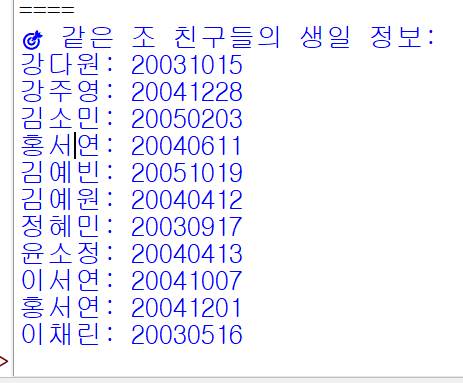

# **과제05**

01) 안된다. 항상 큰 루트가 더 얕은 곳에 위치한다.

02) 아니오

03) n - ⌊n/2⌋ = ⌈ n/2 ⌉ 개

04) 최악: O (n) 최선: O (n)


05) 비효율적이다. 힙속성 유지 비용이 증가하고 불필요한 복사 및 삭제가 일어나며 시간 복잡도가 안확될 가능성이 있기 때문이다.

06) 아니다. 각 원소를 삽입할때마다 해당 원소가 자신의 올바른 위치를 찾을 때까지 부모 노드와 비교하며 올라가야 하기 때문에 스며올리기의 최악 시간 복잡도는 O(log n)이, 전체는 O(n log n), 스며 내리기는 전체 O(n)이다. 힙의 많은 노드가 낮은 높이에 있기 떄문에 스며내리기가 더 효율적이다.

07) A)최대 힙의 루트 노드를 최소 힙에 삽입한다 B) 최소힙에서 가장 작은 값을 추출한다. C)추출된 노드의 자식 노드가 존재한다면 자식 노드들을 최소 힙에 삽입한다. n번 반복후 최소힙에서추출된 값이 n번째로 큰 원소이다

# **과제06**

In [ ]:
import heapq

class KthLargest:
    def __init__(self, k: int, nums: list[int]):
        self.k = k
        self.min_heap = []
        for num in nums:
            self.add(num)

    def add(self, val: int) -> int:
        heapq.heappush(self.min_heap, val)
        if len(self.min_heap) > self.k:
            heapq.heappop(self.min_heap)
        return self.min_heap[0]
